In [1]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import copy
import pandas as pd
from scipy.optimize import curve_fit
from modules.md_utils import coord_initiales_ion, complementaire, longueur_file, longueur_intro

In [2]:
liste_theta_incidence=[85, 80, 75, 70, 60, 45, 30, 15, 0] #degree
liste_color=plt.cm.plasma(np.linspace(0,1,len(liste_theta_incidence)))
E_incident=300
N_salve=3
long_salve=500
T_set = 300 #K
phi_incident = np.random.random()*360 #Degree
nb_step = 1000
dt = 1.e-3 #ps
ion="Ar"
notebook_adress = os.getcwd()

In [3]:
for theta_incident in liste_theta_incidence:
    ########INITIALISATION
    name_config='Ei_'+str(E_incident)+'_thetai_'+str(theta_incident)
    os.chdir(notebook_adress)
    
    if os.path.exists("MD_stat3_Nb_salves_emises_"+name_config+".txt"):
        with open("MD_stat3_Nb_salves_emises_"+name_config+".txt", "rb") as fp:
            Nb_salves_emises = pickle.load(fp)
            
    else:
        os.chdir("/Users/edouardroger/Documents/Cours/X/Projet spatial/Code_MD/md2_sources")
        if os.path.exists('Ar_stat3'):
            os.chdir("/Users/edouardroger/Documents/Cours/X/Projet spatial/Code_MD/md2_sources/Ar_stat3")
            if os.path.exists(name_config):
                os.system('rm -r '+str(name_config))
            else:
                os.makedirs(name_config)
        else:
            os.makedirs('Ar_stat3')
            os.chdir("/Users/edouardroger/Documents/Cours/X/Projet spatial/Code_MD/md2_sources/Ar_stat3")
            os.makedirs(name_config)

        Nb_salves_emises=0
        
    ########CALCUL
    os.chdir("/Users/edouardroger/Documents/Cours/X/Projet spatial/Code_MD/md2_sources/Ar_stat3/"+name_config)

    while Nb_salves_emises < N_salve:
        name_salve='salve_N'+str(Nb_salves_emises+1)

        # Préparation de la config
        os.chdir("/Users/edouardroger/Documents/Cours/X/Projet spatial/Code_MD/md2_sources")
        os.system("make clean")
        os.system("make md2")
        # Tout est stocké dans un nv fichier
        os.chdir("/Users/edouardroger/Documents/Cours/X/Projet spatial/Code_MD/md2_sources/Ar_stat3/"+name_config)
        if os.path.exists(name_salve):
            os.system('rm -r '+name_salve)
        os.makedirs(name_salve)
        os.chdir("/Users/edouardroger/Documents/Cours/X/Projet spatial/Code_MD/md2_sources/Ar_stat3/"+name_config+'/'+name_salve)
        os.makedirs('ion')
        os.makedirs('cfg')
        os.makedirs('clu')
        os.chdir("/Users/edouardroger/Documents/Cours/X/Projet spatial/Code_MD/md2_sources")
        os.system("cp -R cfg/ Ar_stat3/"+name_config+'/'+name_salve+'/cfg')
        os.system("cp md2 Ar_stat3/"+name_config+'/'+name_salve+'/md2')

        # Run
        os.chdir("/Users/edouardroger/Documents/Cours/X/Projet spatial/Code_MD/md2_sources/Ar_stat3/"+name_config+'/'+name_salve)
        command="./md2 -oc cfg/####.cfg -ion Ar"
        command+=" -ionE " + str(E_incident) + " -Tset " + str(T_set) + " -ionT " + str(theta_incident)
        command+=" -tau " + str(0.01) +" -n " + str(nb_step) 
        command+=" -dt " + str(dt) + " +dtv " + " -i1 " + str(long_salve) 
        #command+=" > log 􏰬&"

        os.system(command)

        Nb_salves_emises+=1
        phi_incident=np.random.random()*360

        os.chdir(notebook_adress)
        with open("MD_stat3_Nb_salves_emises_"+name_config+".txt", "wb") as fp:
            pickle.dump(Nb_salves_emises, fp)
        os.chdir("/Users/edouardroger/Documents/Cours/X/Projet spatial/Code_MD/md2_sources/Ar_stat3/"+name_config)
        print('salve '+str(Nb_salves_emises)+' faite')

    print("config "+name_config+' testée')

config Ei_300_thetai_85 testée
config Ei_300_thetai_80 testée
config Ei_300_thetai_75 testée
config Ei_300_thetai_70 testée
config Ei_300_thetai_60 testée
config Ei_300_thetai_45 testée
config Ei_300_thetai_30 testée
config Ei_300_thetai_15 testée
config Ei_300_thetai_0 testée


config Ei_300_thetai_85 lue


/Users/edouardroger/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


config Ei_300_thetai_80 lue
config Ei_300_thetai_75 lue
config Ei_300_thetai_70 lue


/Users/edouardroger/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


config Ei_300_thetai_60 lue
config Ei_300_thetai_45 lue


/Users/edouardroger/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


config Ei_300_thetai_30 lue


/Users/edouardroger/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


config Ei_300_thetai_15 lue


/Users/edouardroger/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


config Ei_300_thetai_0 lue


/Users/edouardroger/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:69: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


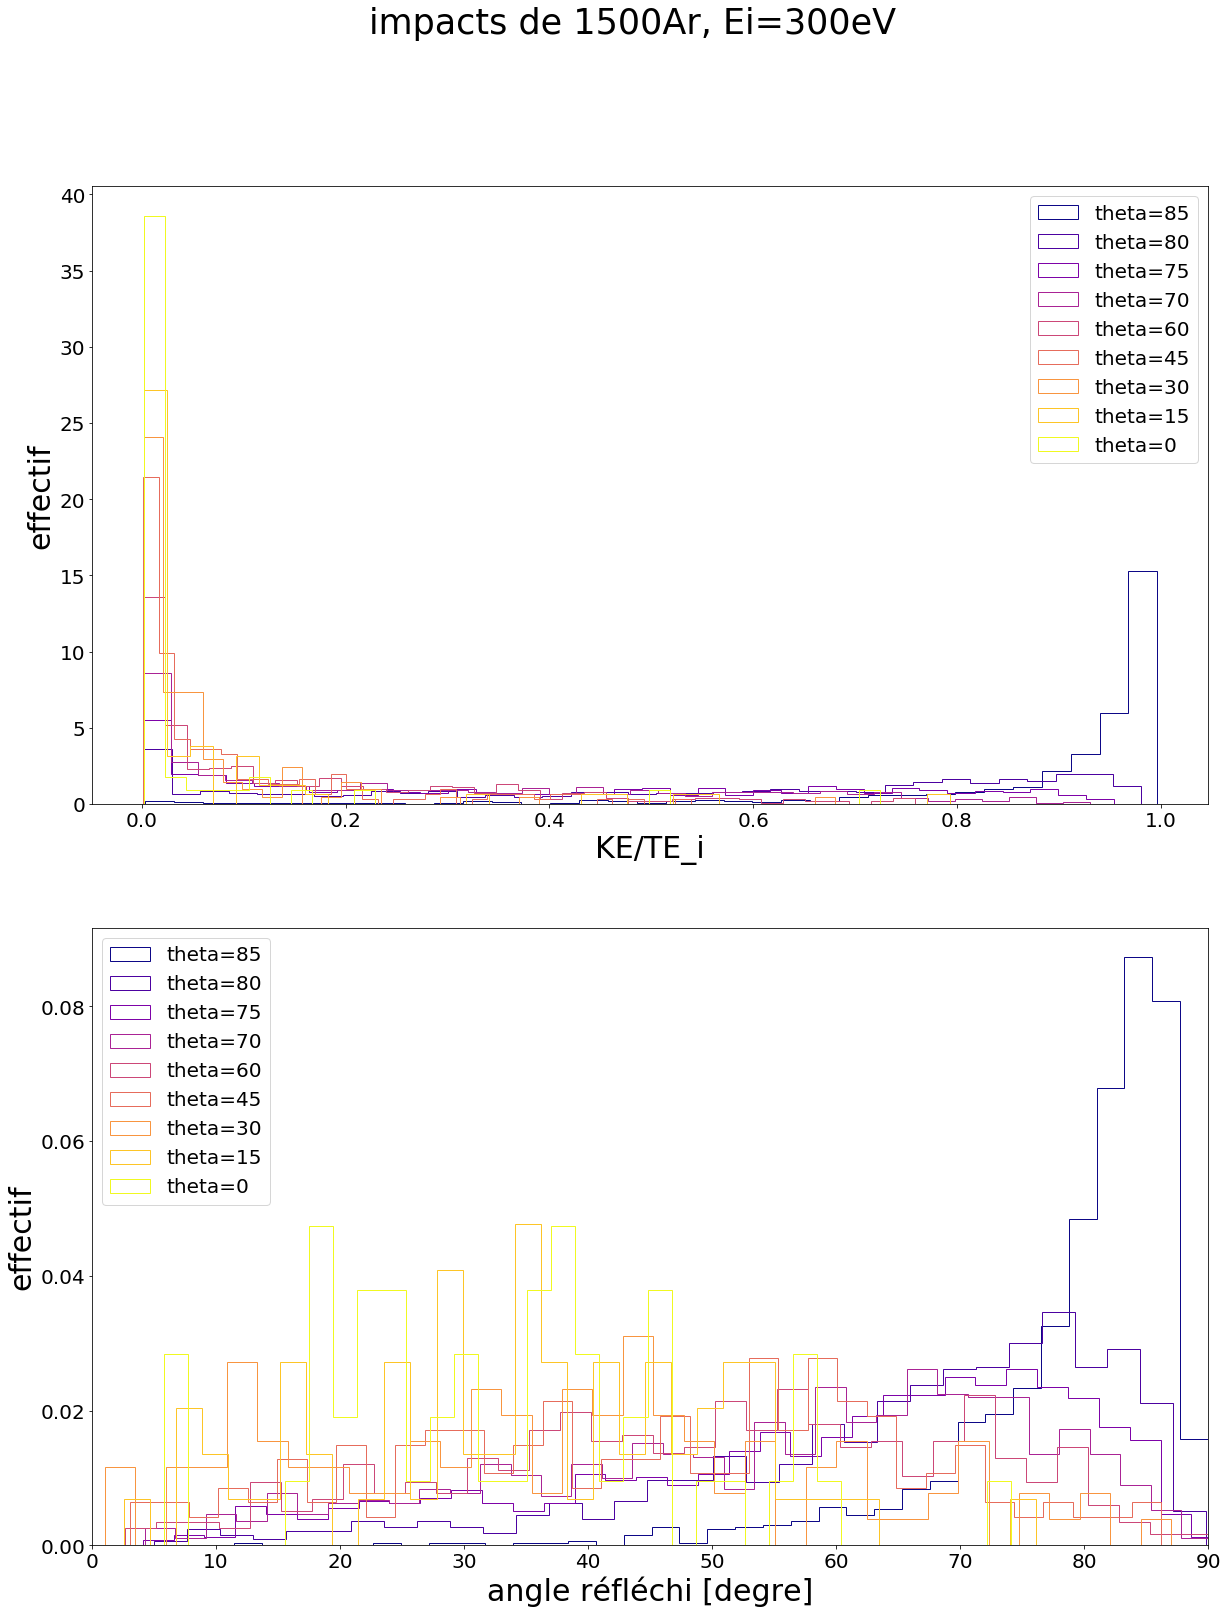

In [24]:
critere_out=-2 #d.z>=critere_out
res=35
liste_mean_E=[]
liste_sigma_E=[]
liste_mean_T=[]
liste_sigma_T=[]

fig = plt.figure(figsize=(20,25))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

for k in range(len(liste_theta_incidence)):
    theta_incident=liste_theta_incidence[k]
    name_config='Ei_'+str(E_incident)+'_thetai_'+str(theta_incident)
    n_out=0
    for i in range(N_salve):
        name_salve='salve_N'+str(i+1)
        for j in range(long_salve):
            path = r"/Users/edouardroger/Documents/Cours/X/Projet spatial/Code_MD/md2_sources/Ar_stat3/"+name_config+'/'+name_salve+"/ion/"+complementaire(j)+".ion"
            long=longueur_file(path)

            df_intermediaire=pd.read_csv(path, header=None,usecols=np.arange(0,10).tolist(), skiprows=long-2, names=['Time step','Integration time','KE/TE_i','internal PE','external PE','d.x','d.y','d.z','norm(d)','#b','imp?'],sep="[:,; ]",engine='python')
            dx=df_intermediaire['d.x'].values[-1]-df_intermediaire['d.x'].values[-2]
            dy=df_intermediaire['d.y'].values[-1]-df_intermediaire['d.y'].values[-2]
            dz=df_intermediaire['d.z'].values[-1]-df_intermediaire['d.z'].values[-2]
            dr=np.sqrt(dx**2+dy**2+dz**2)
            theta_sortie=np.arccos(dz/dr)*180/np.pi
            phi_sortie=np.arctan(dy/dx)*180/np.pi
            out=df_intermediaire['d.z'].values[-1]>=critere_out
            n_out+=int(out)

            if i==0 and j==0:
                df=pd.read_csv(path, header=None,usecols=np.arange(0,10).tolist(), skiprows=long-1, names=['Time step','Integration time','KE/TE_i','internal PE','external PE','d.x','d.y','d.z','norm(d)','#b','imp?'],sep="[:,; ]",engine='python')
                df['theta_f']=theta_sortie
                df['Out?']=out
            else:
                line=pd.read_csv(path, header=None,usecols=np.arange(0,10).tolist(), skiprows=long-1, names=['Time step','Integration time','KE/TE_i','internal PE','external PE','d.x','d.y','d.z','norm(d)','#b','imp?'],sep="[:,; ]",engine='python')
                line['theta_f']=theta_sortie
                line['Out?']=out
                frames = [df, line]
                df = pd.concat(frames)

    df=df.reset_index()
    df.drop(['index','Time step', 'Integration time', '#b', 'd.x', 'd.y', 'd.z', 'norm(d)'], axis='columns', inplace=True)
    indexNames = df[ df['Out?'] == False ].index
    df.drop(indexNames , inplace=True)
    liste_mean_E.append(np.mean(df['KE/TE_i']))
    liste_sigma_E.append(np.std(df['KE/TE_i'])/np.sqrt(n_out))
    liste_mean_T.append(np.mean(df['theta_f']))
    liste_sigma_T.append(np.std(df['theta_f'])/np.sqrt(n_out))

    ax1.hist(df['KE/TE_i'], density=True, histtype='step', bins=res, label='theta='+str(theta_incident), color=liste_color[k])
    ax2.hist(df['theta_f'], density=True, histtype='step', bins=res, label='theta='+str(theta_incident), color=liste_color[k])
    #ax2.axvline(x=theta_incident, linestyle='-',color=liste_color[k])
    
    print('config '+name_config+' lue')

ax1.set_xlabel('KE/TE_i',size=30)
ax1.set_ylabel('effectif',size=30)
ax2.set_xlabel('angle réfléchi [degre]',size=30)
ax2.set_ylabel('effectif',size=30)
ax1.tick_params(axis='both', labelsize=20)
ax2.tick_params(axis='both', labelsize=20)
ax2.set_xlim((0,90))
ax1.legend(fontsize=20)
ax2.legend(fontsize=20, loc='upper left')

fig.suptitle('impacts de '+str(N_salve*long_salve)+'Ar, Ei='+str(E_incident)+'eV', fontsize=35)
fig.show()

In [25]:
def f(x,K0,K1,K2):
    return K0+K1*np.exp(x/K2)

liste_theta_incidence_modif=copy.copy(liste_theta_incidence)
liste_theta_incidence_modif.append(90)
liste_mean_E_modif=copy.copy(liste_mean_E)
liste_mean_E_modif.append(1)
liste_mean_T_modif=copy.copy(liste_mean_T)
liste_mean_T_modif.append(90)

abscisse = np.linspace(0, 90, 100000)

popt, pcov = curve_fit(f, xdata=liste_theta_incidence_modif, ydata=liste_mean_E_modif, p0=[0,1,1000] )
K0, K1, K2=popt[0], popt[1], popt[2]
ordonnee1 = f(abscisse,K0, K1, K2)

popt, pcov = curve_fit(f, xdata=liste_theta_incidence_modif, ydata=liste_mean_T_modif, p0=[0,1,10] )
K0_bis, K1_bis, K2_bis=popt[0], popt[1], popt[2]
ordonnee2 = f(abscisse,K0_bis, K1_bis, K2_bis)

/Users/edouardroger/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


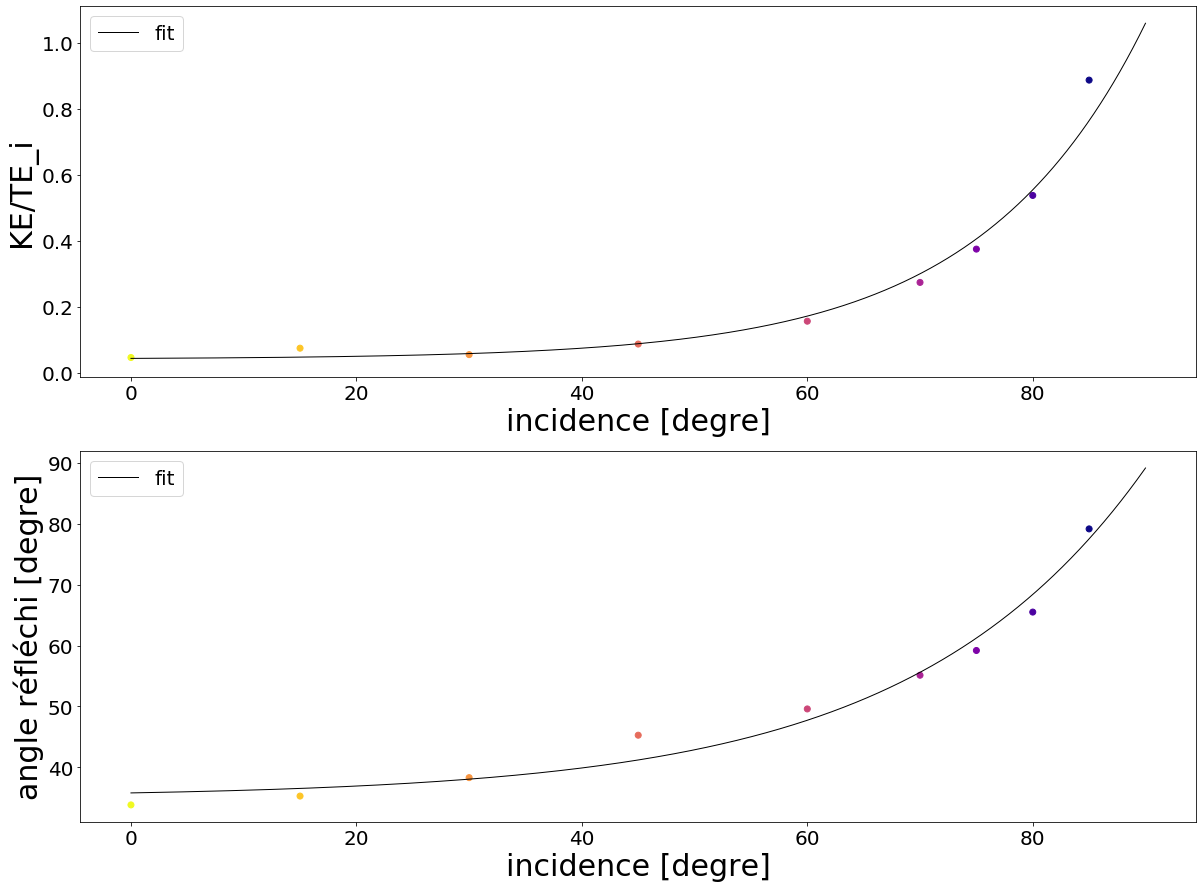

In [26]:
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.scatter(liste_theta_incidence, liste_mean_E, c=liste_color)
ax1.plot(abscisse, ordonnee1, label='fit', color='k', linewidth=1)
ax1.set_xlabel('incidence [degre]',size=30)
ax1.set_ylabel('KE/TE_i',size=30)
ax1.tick_params(axis='both', labelsize=20)
ax1.legend(fontsize=20)

ax2.scatter(liste_theta_incidence, liste_mean_T, c=liste_color)
ax2.plot(abscisse, ordonnee2, label='fit', color='k', linewidth=1)
ax2.set_xlabel('incidence [degre]',size=30)
ax2.set_ylabel('angle réfléchi [degre]',size=30)
ax2.tick_params(axis='both', labelsize=20)
ax2.legend(fontsize=20)

fig.show()

In [27]:
def g(x,A,B):
    return A*x+B

abscisse = np.linspace(0, 90, 100000)

popt, pcov = curve_fit(g, xdata=liste_theta_incidence, ydata=liste_sigma_E, p0=[1,0] )
A,B=popt[0], popt[1]
ordonnee1 = g(abscisse,A, B)

popt, pcov = curve_fit(g, xdata=liste_theta_incidence, ydata=liste_sigma_T, p0=[1,0] )
A_bis, B_bis=popt[0], popt[1]
ordonnee2 = g(abscisse,A_bis, B_bis)

/Users/edouardroger/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


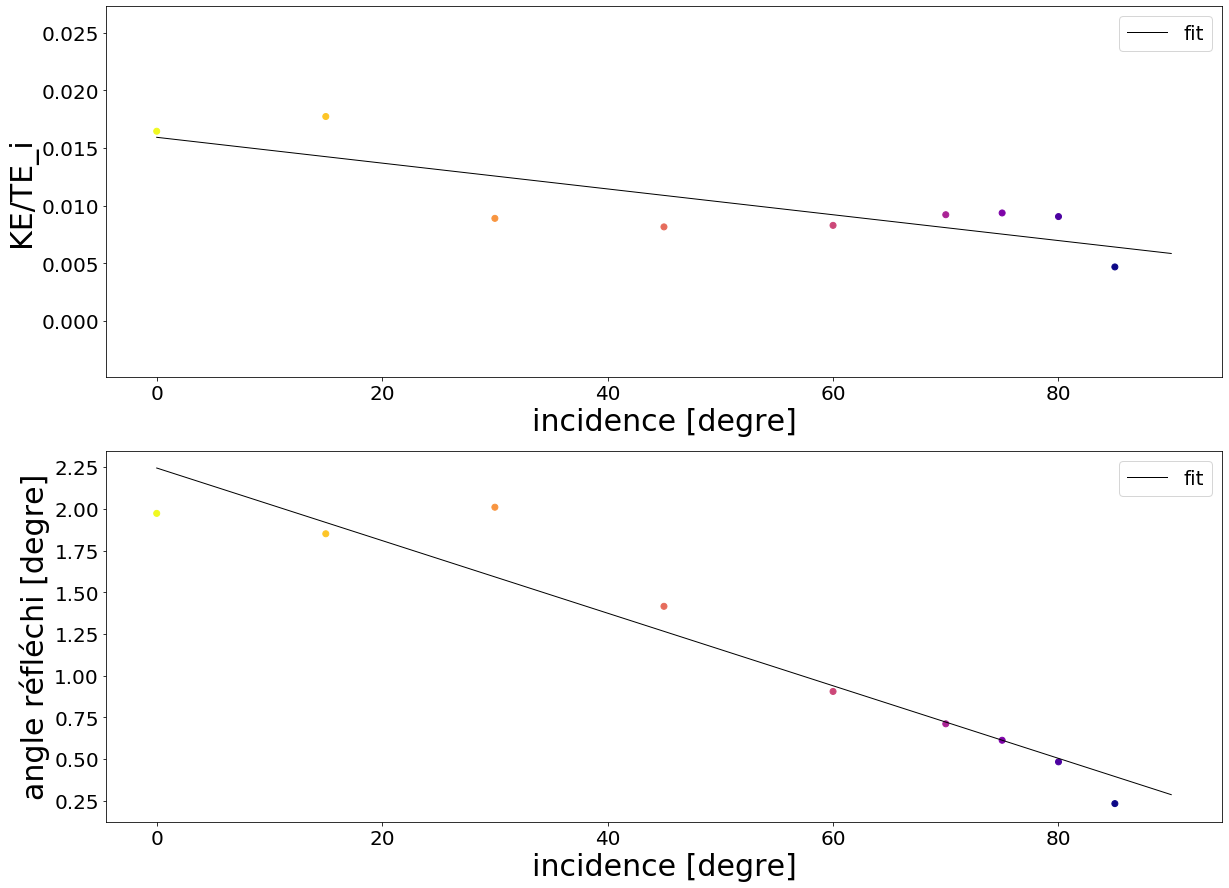

In [28]:
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.scatter(liste_theta_incidence, liste_sigma_E, c=liste_color)
ax1.plot(abscisse, ordonnee1, label='fit', color='k', linewidth=1)
ax1.set_xlabel('incidence [degre]',size=30)
ax1.set_ylabel('KE/TE_i',size=30)
ax1.tick_params(axis='both', labelsize=20)
ax1.legend(fontsize=20)

ax2.scatter(liste_theta_incidence, liste_sigma_T, c=liste_color)
ax2.plot(abscisse, ordonnee2, label='fit', color='k', linewidth=1)
ax2.set_xlabel('incidence [degre]',size=30)
ax2.set_ylabel('angle réfléchi [degre]',size=30)
ax2.tick_params(axis='both', labelsize=20)
ax2.legend(fontsize=20)

fig.show()

In [23]:
print("moyenne du rapport d'énergie en fc de l'incidence[degree]")
print("K0+K1*exp(x/K2)")
print('K0=',K0)
print('K1=',K1)
print('K2=',K2)
print("")
print("moyenne de l'angle de sortie[degree] en fc de l'incidence[degree]")
print("K0_bis+K1_bis*exp(x/K2_bis)")
print('K0_bis=',K0_bis)
print('K1_bis=',K1_bis)
print('K2_bis=',K2_bis)
print("")
print("écart-type du rapport d'énergie en fc de l'incidence[degree]")
print("A*x+B")
print('A=',A)
print('B=',B)
print("")
print("écart-type de l'angle de sortie[degree] en fc de l'incidence[degree]")
print("A_bis*x+B_bis")
print('A_bis=',A_bis)
print('B_bis=',B_bis)

moyenne du rapport d'énergie en fc de l'incidence[degree]
K0+K1*exp(x/K2)
K0= 0.04247516502020671
K1= 0.0021335243425487055
K2= 14.59526779532129

moyenne de l'angle de sortie[degree] en fc de l'incidence[degree]
K0_bis+K1_bis*exp(x/K2_bis)
K0_bis= 35.1103231649037
K1_bis= 0.688337846576412
K2_bis= 20.62395967467933

écart-type du rapport d'énergie en fc de l'incidence[degree]
A*x+B
A= -0.00011203526484633867
B= 0.01593584601844323

écart-type de l'angle de sortie[degree] en fc de l'incidence[degree]
A_bis*x+B_bis
A_bis= -0.02174609209641387
B_bis= 2.2443403827218846
